<a href="https://colab.research.google.com/github/ikkaya/PAINS_DrugBank/blob/master/PAINS_DrugBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole   #Needed to show molecules

In [0]:
painsdf= pd.read_csv("wehi_pains.csv", header = None, names = ["smarts", "painsid"])
painsdf.head()

,smarts,painsid
0,c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7...,<regId=anil_di_alk_F(14)>
1,c:1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[...,<regId=hzone_anil(14)>
2,"c1(nn(c([c;!H0,$(c-[#6;!H0])]1)-[#8]-[#1])-c:2...",<regId=het_5_pyrazole_OH(14)>
3,"c:2(:c:1-[#16]-c:3:c(-[#7;!H0,$([#7]-[CH3]),$(...",<regId=het_thio_666_A(13)>
4,[#6]-2-[#6]-c:1:c(:c:c:c:c:1)-[#6](-c:3:c:c:c:...,<regId=styrene_A(13)>


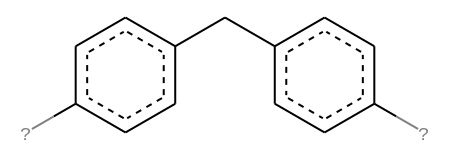

In [0]:
# Show the first SMARTS
Chem.MolFromSmarts(painsdf.smarts[0])

In [0]:
drugdf = pd.read_csv("drugbank_results_WithSMILES.csv", encoding='latin-1')
drugdf.head()

,DrugBank ID,Name,SMILES
0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
2,DB00027,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...
4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...


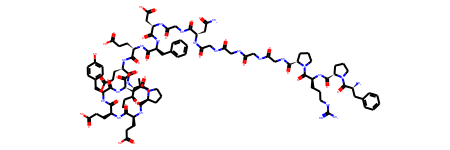

In [0]:
# Show the first SMILES
Chem.MolFromSmiles(drugdf.SMILES[0])

In [0]:
# Number of pains patterns
npat = painsdf.shape[0]
npat

480

In [0]:
# Number of molecules in drugdb
nmol = drugdf.shape[0]
nmol

10630

In [0]:
# Create the output n molecules x p patterns matrix filled with zeros
from numpy import zeros
resmat = zeros([nmol,npat])
resmat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
# Generate the patterns from the SMARTS
painsdf["patt"]  = painsdf["smarts"].apply(Chem.MolFromSmarts)
painsdf.head()

,smarts,painsid,patt
0,c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7...,<regId=anil_di_alk_F(14)>,<rdkit.Chem.rdchem.Mol object at 0x7fe4255e7440>
1,c:1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[...,<regId=hzone_anil(14)>,<rdkit.Chem.rdchem.Mol object at 0x7fe4252fd580>
2,"c1(nn(c([c;!H0,$(c-[#6;!H0])]1)-[#8]-[#1])-c:2...",<regId=het_5_pyrazole_OH(14)>,<rdkit.Chem.rdchem.Mol object at 0x7fe4252fd6c0>
3,"c:2(:c:1-[#16]-c:3:c(-[#7;!H0,$([#7]-[CH3]),$(...",<regId=het_thio_666_A(13)>,<rdkit.Chem.rdchem.Mol object at 0x7fe4252fd710>
4,[#6]-2-[#6]-c:1:c(:c:c:c:c:1)-[#6](-c:3:c:c:c:...,<regId=styrene_A(13)>,<rdkit.Chem.rdchem.Mol object at 0x7fe4252fd760>


In [0]:
# Generate the molecules from the SMILES
drugdf["mol"] = drugdf["SMILES"].apply(Chem.MolFromSmiles)
drugdf.head()

In [0]:
# Double loop over molecules and patterns to find matches; if any of molecules or patterns are None (failed to be created)
# set output to -1; if match, fill with 1. 
for i in range(drugdf.shape[0]):
    for j in range(painsdf.shape[0]):
        m = drugdf["mol"].iloc[i]
        p = painsdf["patt"].iloc[j]
        if m is None or p is None:
            resmat[i][j] = -1
        else:
            resmat[i][j] = m.HasSubstructMatch(p) 

In [0]:
# Show the matches; first array displays the row (molecule); second array displays the column (pattern)
np.where(resmat == 1)

(array([   64,   145,   170,   198,   214,   276,   296,   334,   384,
          387,   426,   501,   579,   676,   693,   731,   755,   840,
          872,   889,   897,   901,   974,   987,   995,  1008,  1026,
         1036,  1046,  1073,  1073,  1107,  1118,  1129,  1197,  1243,
         1316,  1414,  1415,  1456,  1582,  1692,  1773,  1861,  1917,
         1986,  2126,  2130,  2135,  2159,  2250,  2354,  2354,  2544,
         2553,  2668,  2726,  2727,  2879,  2885,  2885,  2899,  2962,
         3109,  3138,  3237,  3259,  3275,  3280,  3283,  3313,  3439,
         3479,  3487,  3527,  3535,  3555,  3555,  3689,  3713,  3739,
         3753,  3837,  3940,  3944,  3967,  4067,  4133,  4210,  4230,
         4230,  4251,  4325,  4379,  4396,  4510,  4510,  4551,  4561,
         4649,  4687,  4695,  4759,  4812,  4812,  4827,  4851,  4859,
         4875,  4918,  4947,  5093,  5094,  5144,  5273,  5329,  5499,
         5588,  5667,  5667,  5711,  5726,  5941,  5951,  5955,  5981,
      

In [0]:
# Check that resmat is 1 for molecule 64 and pattern 468
resmat[64][468]

1.0

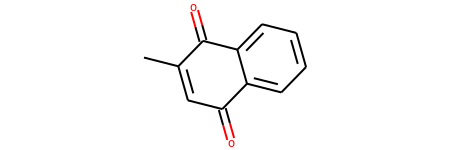

In [0]:
# Show the molecule with the match
drugdf.mol.iloc[64]

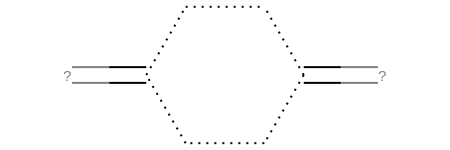

In [0]:
# Show the pattern with the match; see that it makes sense
painsdf.patt.iloc[468]

In [0]:
num_ones = (np.where(resmat == 1))
num_ones[1]

array([468, 473, 423, 468,   4, 468, 472, 468, 469, 416,   4, 468, 468,
       469,  10, 469,  29, 433, 468, 469, 468, 473, 423, 468, 416,  10,
       473, 473, 468, 433, 468,  29, 469, 473, 185, 469, 457,  29,  29,
       468, 468, 468, 469, 473,  18, 423, 423, 468, 468, 468, 468, 433,
       468, 423, 428, 469, 468, 468, 468, 205, 470, 468, 469, 469, 469,
        10, 469, 468, 468, 469, 469, 477, 469, 469, 472, 472, 433, 468,
       468, 468, 472, 468, 468, 416, 468, 469, 469, 469, 468, 457, 468,
        15, 468, 468, 468, 433, 468, 468, 473, 409, 473, 468, 468, 433,
       468, 413, 469, 468, 473, 468, 468, 468, 468, 433, 469, 437, 437,
       473, 205, 470, 468,  10, 473, 468, 468, 469, 472, 468, 468, 468,
       469, 457, 474, 473, 473, 469, 478,  11, 474, 469, 469, 469, 469,
       469, 412, 472, 473, 468, 469, 469, 469, 469, 468, 468, 412, 412,
       469, 469, 470,  10, 205, 470, 468, 472, 469, 468, 472, 472, 409,
       423, 426, 468, 468, 468, 473, 473, 468, 205, 470, 468, 46

In [0]:
unique, counts = np.unique(num_ones[1], return_counts = True)
dict(zip(unique, counts))

{4: 3,
 10: 7,
 11: 1,
 15: 1,
 18: 1,
 29: 7,
 185: 2,
 205: 7,
 409: 2,
 412: 3,
 413: 1,
 416: 7,
 423: 6,
 426: 1,
 428: 1,
 433: 8,
 437: 2,
 457: 4,
 468: 79,
 469: 42,
 470: 8,
 472: 10,
 473: 18,
 474: 3,
 477: 2,
 478: 2}

In [0]:
counts

array([ 3,  7,  1,  1,  1,  7,  2,  7,  2,  3,  1,  7,  6,  1,  1,  8,  2,
        4, 79, 42,  8, 10, 18,  3,  2,  2])

In [0]:
y = sorted(dict(zip(unique, counts)).values(), reverse=True)
y

[79,
 42,
 18,
 10,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [0]:
df=pd.DataFrame(unique,counts,columns=['pains'])
df

,pains
3,4
7,10
1,11
1,15
1,18
7,29
2,185
7,205
2,409
3,412


In [0]:
df.sort_index(ascending=False)

,pains
79,468
42,469
18,473
10,472
8,470
8,433
7,29
7,205
7,416
7,10


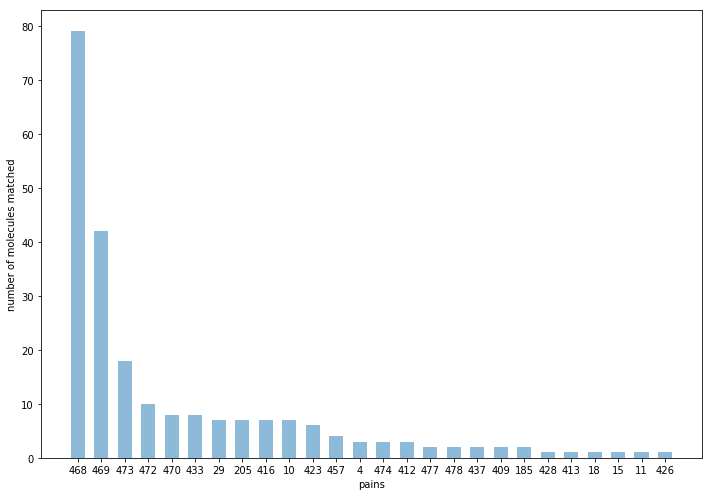

In [0]:
plt.figure(figsize = [10,7])
plt.bar(df.sort_index(ascending=False)['pains'].apply(str),y,alpha=0.5,width=0.6)
plt.xlabel('pains')
plt.ylabel('number of molecules matched')
plt.tight_layout()

In [0]:
len(num_ones[0]) #number of molecules that have substructure matches

228

In [0]:
len(num_ones[1])

228

In [0]:
non_match = nmol-len(set(num_ones[0]))
non_match

10415

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text xticklabel objects>)

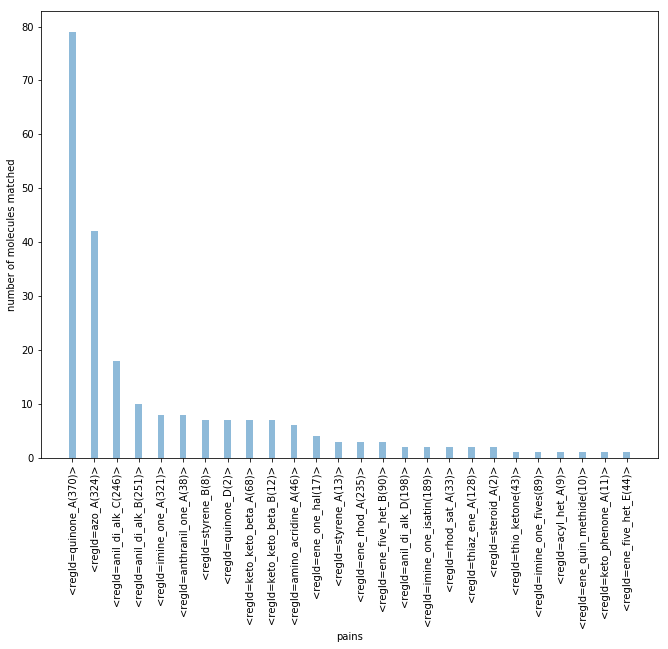

In [0]:
#barplot with the painsid 
plt.figure(figsize = [10,7])
plt.bar(painsdf['painsid'].iloc[df.sort_index(ascending=False)['pains']],y,alpha=0.5,width=0.3)
plt.xlabel('pains')
plt.ylabel('number of molecules matched')
plt.tight_layout()
plt.xticks(rotation=90)

In [0]:
most_hitting_smarts = painsdf['smarts'].iloc[df.sort_index(ascending=False)['pains']].head()
most_hitting_smarts

468    [!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]...
469                                         [#7;!R]=[#7]
473    c:1:c:c(:c:c:c:1-[#8]-[#6;X4])-[#7;$([#7!H0]-[...
472    c:1:c:c(:c:c:c:1-[#7](-[#6;X4])-[#6;X4])-[#6]=...
470    [#6]-[#6](=[!#6&!#1;!R])-[#6](=[!#6&!#1;!R])-[...
Name: smarts, dtype: object

In [0]:
smart_list = most_hitting_smarts.values.tolist()
smart_list

['[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]=,:[#6]1',
 '[#7;!R]=[#7]',
 'c:1:c:c(:c:c:c:1-[#8]-[#6;X4])-[#7;$([#7!H0]-[#6;X4]),$([#7](-[#6;X4])-[#6;X4])]',
 'c:1:c:c(:c:c:c:1-[#7](-[#6;X4])-[#6;X4])-[#6]=[#6]',
 '[#6]-[#6](=[!#6&!#1;!R])-[#6](=[!#6&!#1;!R])-[$([#6]),$([#16](=[#8])=[#8])]']

In [0]:
mol_list = [Chem.MolFromSmarts(smarts) for smarts in smart_list]
mol_list

In [0]:
mol_ids = painsdf['painsid'].iloc[df.sort_index(ascending=False)['pains']].head().values.tolist()
mol_ids

['<regId=quinone_A(370)>',
 '<regId=azo_A(324)>',
 '<regId=anil_di_alk_C(246)>',
 '<regId=anil_di_alk_B(251)>',
 '<regId=imine_one_A(321)>']

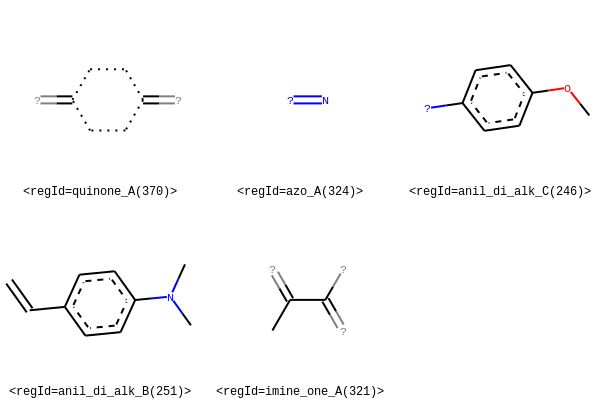

In [0]:
Chem.Draw.MolsToGridImage(mol_list, legends=mol_ids) #the structures of the 5 most hitting SMARTS

In [0]:
names_of_mol = drugdf.loc[num_ones[0],['Name']] # names of the molecules that match the PAINS
names_of_mol

,Name
64,Menadione
145,Terconazole
170,Amsacrine
198,Mitomycin
214,Amitriptyline
276,Valrubicin
296,Gentian violet cation
334,Epirubicin
384,Zidovudine
387,Phenindione
